In [1]:
!python -m pip install pytorch-lightning

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 819.3/819.3 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   - -------------------------------------- 6.3/204.2 MB 29.7 MB/s eta 0:00:07
   -- ------------------------------------- 10.7/204.2 MB 29.1 MB/s eta 0:00:07
   -- ------------------------------------- 12.8/204.2 MB 21.2 MB/s eta 0:00:10
   --- ------------------------------------ 17.3/204.2 MB 20.2 MB/s eta 0:00:10
   --- ------------------------------------ 19.7/204.2 MB 18.8 MB/s eta 0:00:10
   ---- ----------------------------------- 22.3/204.2 MB 17.6 MB/s eta 0:00:11
   ---- ----------------------------------- 24.4/204.2 MB 16.4 MB/s eta 0:00:11
   ----- ---------------------------------- 26.5/204.2 MB 15.7 MB/s eta 0:00:12
   ----- ---------------------------------- 28.8/204.2 MB 15.2 MB/s eta 0:00

In [3]:
!python -m pip install einops

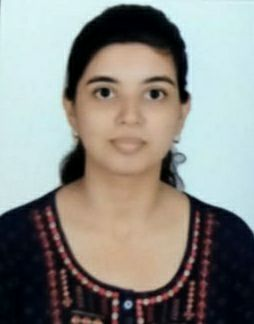

In [12]:
from model import DiffusionModel

from PIL import Image
import torch
import numpy as np
import math

model = DiffusionModel((728 * 728), 1000, 3)

# How many noise levels to generate
noise_levels = [0, 10, 50, 75, 100, 250, 500, 750, 1000]
img = Image.open(r'C:\Users\Kaushiki\Downloads\GENAI_with_LLms\SD\Kd.jpg')
img_tensor = torch.tensor(np.array(img))

img_tensor = ((img_tensor / 255.0) * 2.0) - 1.0
# Create a batch by repeating the same image many times
batch = img_tensor.repeat(len(noise_levels), 1, 1, 1)

ts = torch.tensor(noise_levels, dtype=torch.int, device=batch.device)
noise_imgs = []
epsilons = torch.randn(batch.shape, device=batch.device)
# Generate a noisifed version of the image for each noise level
for i in range(len(ts)):
    a_hat = model.alpha_bar(ts[i])
    noise_imgs.append(
        (math.sqrt(a_hat) * batch[i]) + (math.sqrt(1 - a_hat) * epsilons[i])
    )


noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)

# Convert back to image and display
display_img = Image.fromarray(noise_imgs[0].squeeze(0).numpy(), 'RGB')
display_img

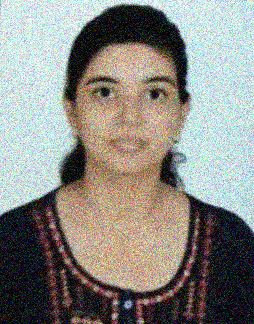

In [11]:
display_img = Image.fromarray(noise_imgs[3].squeeze(0).numpy(), 'RGB')
display_img

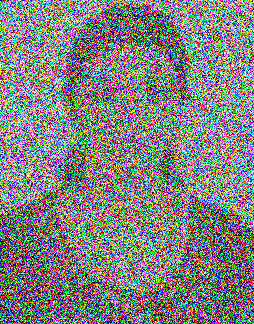

In [7]:
display_img = Image.fromarray(noise_imgs[6].squeeze(0).numpy(), 'RGB')
display_img

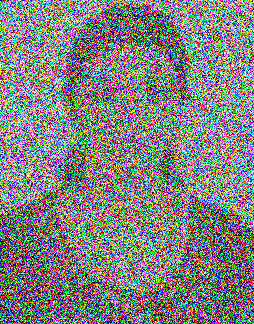

In [8]:
display_img = Image.fromarray(noise_imgs[6].squeeze(0).numpy(), 'RGB')
display_img

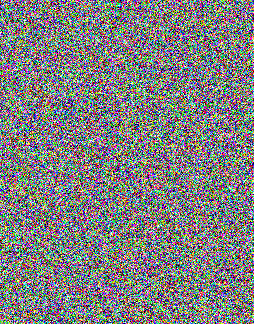

In [10]:
display_img = Image.fromarray(noise_imgs[8].squeeze(0).numpy(), 'RGB')
display_img

In [13]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.0 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 18.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.3 MB/s eta 0:00:00


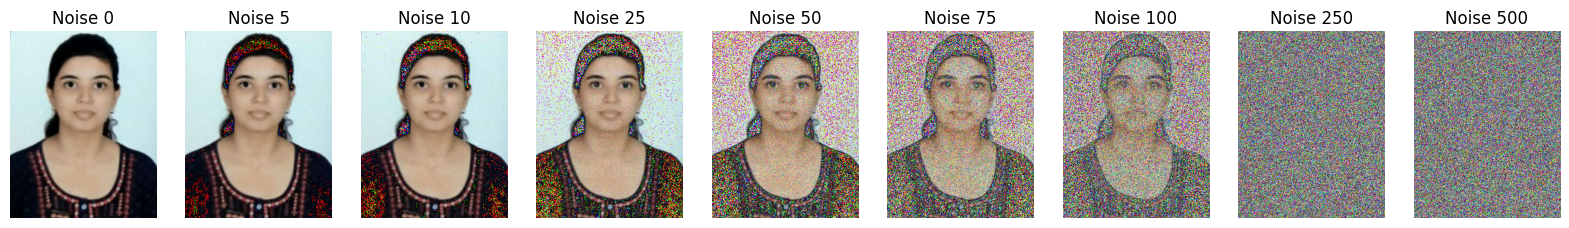

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch

# How many noise levels to generate
noise_levels = [0, 5, 10,25,50, 75, 100, 250, 500]

# Open the image
img = Image.open(r'Kd.jpg')

# Convert the image to a tensor
img_tensor = torch.tensor(np.array(img))
img_tensor = ((img_tensor / 255.0) * 2.0) - 1.0

# Generate noise images (example)
noise_imgs = [img_tensor + (torch.randn(img_tensor.size()) * level / 255.0) for level in noise_levels]

# Convert back to images and display
fig, axes = plt.subplots(1, len(noise_levels), figsize=(20, 5))
for i, ax in enumerate(axes):
    display_img = Image.fromarray(((noise_imgs[i].numpy() + 1.0) * 0.5 * 255.0).astype(np.uint8), 'RGB')
    ax.imshow(display_img)
    ax.axis('off')
    ax.set_title(f"Noise {noise_levels[i]}")

plt.show()
